In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

C:\Users\guill\anaconda3\envs\mid_project\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
card = pd.read_excel('../data/raw/creditmarketing_names.xlsx')
card.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [3]:
def lower_lower_clear(df):
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace('#_', '')
lower_lower_clear(card)

In [4]:
card['overdraft_protection'].value_counts()

No     15322
Yes     2678
Name: overdraft_protection, dtype: int64

In [5]:
card.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


Finding number of rows 

In [6]:
card.shape

(18000, 17)

Finding out unique values

In [7]:
for i in card[['offer_accepted', 'reward', 'mailer_type', 'credit_cards_held', 'household_size']]:
    print(card[i].value_counts(), '\n ------------------')

No     16977
Yes     1023
Name: offer_accepted, dtype: int64 
 ------------------
Air Miles    6061
Cash Back    5999
Points       5940
Name: reward, dtype: int64 
 ------------------
Postcard    9147
Letter      8853
Name: mailer_type, dtype: int64 
 ------------------
2    7944
1    6154
3    3387
4     515
Name: credit_cards_held, dtype: int64 
 ------------------
3    5712
4    5543
5    2853
2    2813
1     539
6     538
8       1
9       1
Name: household_size, dtype: int64 
 ------------------


In [8]:
card.groupby(['income_level']).agg({'average_balance' : 'sum'})

,average_balance
income_level,
High,4259492.00
Low,4177297.50
Medium,8469918.25


Return first 10 customer_number in decreasing order with highest average balance, ordered by average balance

In [9]:
card[['customer_number', 'average_balance']].sort_values(by = 'average_balance', ascending = False).head(10)

,customer_number,average_balance
2296,2297,3366.25
12635,12636,2948.50
8887,8888,2738.50
10576,10577,2609.50
14003,14004,2437.50
10475,10476,2430.00
2655,2656,2336.75
15259,15260,2320.50
15608,15609,2271.50
8777,8778,2073.25


Getting average balance of each customer and total average

In [10]:
card.groupby(['customer_number']).agg({'average_balance': 'mean'})

,average_balance
customer_number,
1,1160.75
2,147.25
3,276.50
4,1219.00
5,1211.00
...,...
17996,167.50
17997,850.50
17998,1087.25


In [11]:
card['average_balance'].mean()

940.5155624165554



average_balance of customers grouped by income_level



In [12]:
card.groupby(['income_level']).agg({'average_balance': 'mean'})

,average_balance
income_level,
High,942.574021
Low,937.664983
Medium,940.892940




average_balance of customers grouped by bank_accounts_open



In [13]:
card.groupby(['bank_accounts_open']).agg({'average_balance': 'mean'})

,average_balance
bank_accounts_open,
1,941.533604
2,936.469491
3,948.284746




average number of credit cards held by customers for each credit card rating



In [14]:
card.groupby(['credit_rating']).agg({'credit_cards_held': 'mean'})

,credit_cards_held
credit_rating,
High,1.895240
Low,1.903811
Medium,1.911587




Checking if there is any correlation between credit_cards_held and bank_accounts_open

As it can be seen below, there are none

In [15]:
corr = card['credit_cards_held'].corr(card['bank_accounts_open'])

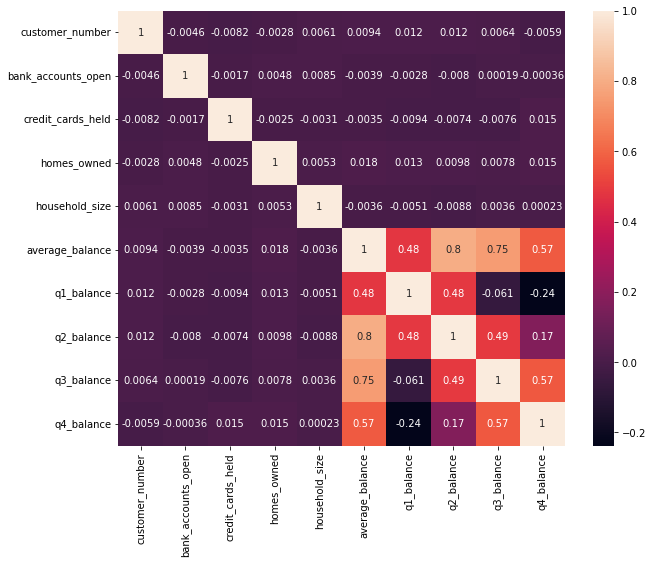

In [16]:
%matplotlib inline
corr_matrix=card.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()


Data filtered by:
        - Credit rating medium or high
        - Credit cards held 2 or less
        - Owns their own home
        - Household size 3 or more
Checking out how many customers answered Yes to the offer(offer_accepted column)


In [17]:
main_parameters = card.loc[(card['credit_cards_held'] <= 2) & (card['own_your_home'] == 'Yes') & (card['household_size'] >= 3) 
         & ((card['credit_rating'] == 'High') | (card['credit_rating'] == 'Medium'))].head()

In [18]:
main_parameters['offer_accepted'].value_counts()

No    5
Name: offer_accepted, dtype: int64

There are no 'Yes' in the column offer_accepted from the filtered data



Filtering the customers whom average balance is below the average balance of the whole.



In [19]:
general_mean = card['average_balance'].mean()

In [20]:
card[card['average_balance'] < general_mean].head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
6,7,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,283.75,468.0,188.0,347.0,132.0
7,8,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,278.50,132.0,391.0,285.0,306.0
21,22,No,Points,Letter,Medium,1,No,Low,2,2,3,Yes,811.75,720.0,407.0,1224.0,896.0



Column inficating in which percentile each customer is, related to the average_balance mean


In [21]:
iqr = np.nanpercentile(card['average_balance'], 75) - np.nanpercentile(card['average_balance'], 25)
upper_limit = np.nanpercentile(card['average_balance'], 75) + 1.5*iqr
lower_limit = np.nanpercentile(card['average_balance'], 25) - 1.5*iqr
print(upper_limit,'|', lower_limit)

1701.875 | 238.875


In [22]:
percentile_list = []
for i in card['average_balance']:
    if i >= 0 and i < lower_limit:
        percentile_list.append('Q1')
    elif i >= lower_limit and i < general_mean:
        percentile_list.append('Q2')
    elif i >= general_mean and i < upper_limit:
        percentile_list.append('Q3')
    else:
        percentile_list.append('Q4')

In [23]:
card['customers_balance_view'] = percentile_list
card.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,customers_balance_view
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0,Q3
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0,Q1
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0,Q2
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0,Q3
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0,Q3




Number of people who accepted the offer against those who didn´t



In [24]:
card['offer_accepted'].value_counts()

No     16977
Yes     1023
Name: offer_accepted, dtype: int64


Checking if there's difference between average_balances of high and medium credit rating against low credit card rating


In [25]:
card.groupby(['credit_rating']).agg({'average_balance' : 'mean'})

,average_balance
credit_rating,
High,944.391573
Low,940.340745
Medium,936.748910


There is no great difference between high_rank and low_rank, not enough to considerate it a differentiative indicator






Finding out types of communication and with how many customers were used.



In [26]:
card['mailer_type'].value_counts()

Postcard    9147
Letter      8853
Name: mailer_type, dtype: int64

In [27]:
card.groupby(['mailer_type']).agg({'customer_number': 'count'})

,customer_number
mailer_type,
Letter,8853
Postcard,9147



Finding the customer that is the 11th least 'Q1_balance' in your database


In [28]:
ordered_q1 = card[['customer_number', 'q1_balance']].sort_values(by = 'q1_balance', ascending = False)

In [29]:
ordered_q1 = ordered_q1.dropna()

In [30]:
ordered_q1.iloc[[-11]]

,customer_number,q1_balance
4171,4172,1.0



Dealing with nan


In [31]:
card.isnull().sum()

customer_number            0
offer_accepted             0
reward                     0
mailer_type                0
income_level               0
bank_accounts_open         0
overdraft_protection       0
credit_rating              0
credit_cards_held          0
homes_owned                0
household_size             0
own_your_home              0
average_balance           24
q1_balance                24
q2_balance                24
q3_balance                24
q4_balance                24
customers_balance_view     0
dtype: int64

In [32]:
card = card.dropna()

We drop NaN values since they don't represent great amount compared to the total.
As we saw before the correlation between them is very high, because average_balance is the mean of 
qn_balance 

In [33]:
card.isnull().sum()

customer_number           0
offer_accepted            0
reward                    0
mailer_type               0
income_level              0
bank_accounts_open        0
overdraft_protection      0
credit_rating             0
credit_cards_held         0
homes_owned               0
household_size            0
own_your_home             0
average_balance           0
q1_balance                0
q2_balance                0
q3_balance                0
q4_balance                0
customers_balance_view    0
dtype: int64

In [34]:
card['household_size'].value_counts()

3    5705
4    5532
5    2851
2    2809
1     539
6     538
8       1
9       1
Name: household_size, dtype: int64

Numerical Distributions 

In [37]:
num = card.select_dtypes(include = np.number)

In [38]:
num.head()

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,2,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,3,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0


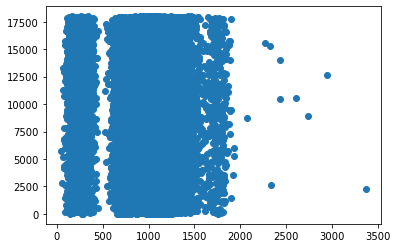

In [39]:
fig, ax = plt.subplots()
ax.scatter(x = num['average_balance'], y = num['customer_number'])
plt.show()

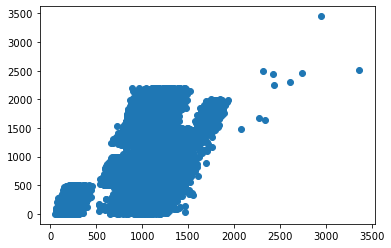

In [40]:
fig, ax = plt.subplots()
ax.scatter(x = num['average_balance'], y = num['q1_balance'])
plt.show()

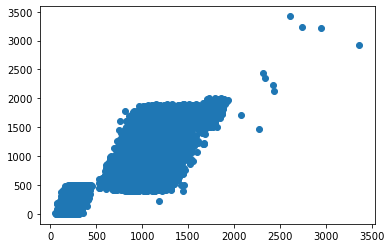

In [41]:
fig, ax = plt.subplots()
ax.scatter(x = num['average_balance'], y = num['q2_balance'])
plt.show()

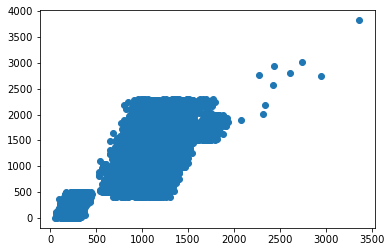

In [42]:
fig, ax = plt.subplots()
ax.scatter(x = num['average_balance'], y = num['q3_balance'])
plt.show()

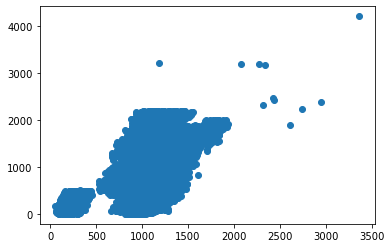

In [43]:
fig, ax = plt.subplots()
ax.scatter(x = num['average_balance'], y = num['q4_balance'])
plt.show()

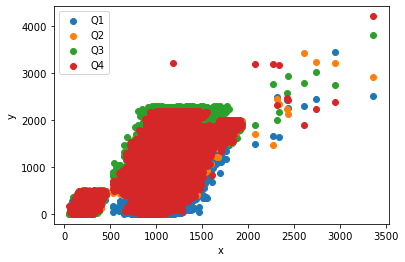

In [44]:
fig, ax = plt.subplots()
ax.scatter(num['average_balance'], num['q1_balance'], label = 'Q1') 
ax.scatter(num['average_balance'], num['q2_balance'], label = 'Q2')
ax.scatter(num['average_balance'], num['q3_balance'], label = 'Q3')
ax.scatter(num['average_balance'], num['q4_balance'], label = 'Q4')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend()
plt.show()


We find some otuliers and linear distributions

Removing outliers

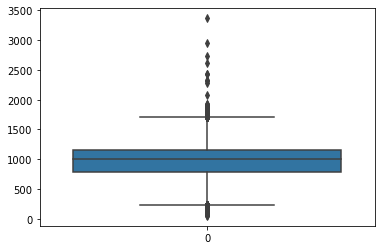

In [45]:
sns.boxplot(data = card['average_balance'])
plt.show()

In [46]:
iqr = np.nanpercentile(card['average_balance'],75) - np.nanpercentile(card['average_balance'],25)

upper_limit = np.nanpercentile(card['average_balance'],75) + 1.5*iqr
lower_limit = np.nanpercentile(card['average_balance'],25) - 1.5*iqr

extra_points_up = card[card['average_balance'] > upper_limit]
extra_points_down = card[card['average_balance'] < lower_limit]

print(len(extra_points_up))
len(extra_points_down)

278


1163

In [47]:
upper_limit_85 = np.nanpercentile(card['average_balance'],85) + 1.5*iqr

extra_points_up_85 = card[card['average_balance'] > upper_limit_85]
len(extra_points_up_85)

111

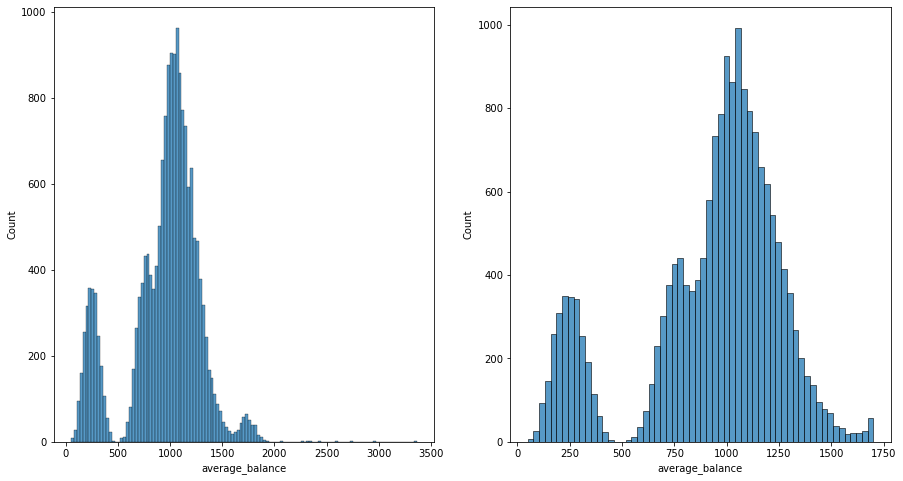

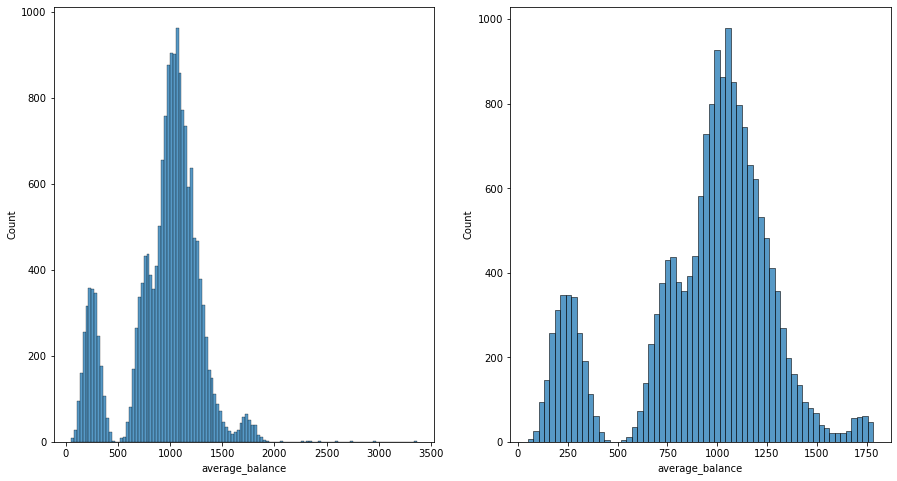

In [48]:
card_outliers_dropped = card[card['average_balance'] <= upper_limit].copy()

fig, ax = plt.subplots(1, 2, figsize = (15, 8))
sns.histplot(x = 'average_balance', data = card, ax = ax[0])
sns.histplot(x = 'average_balance', data = card_outliers_dropped, ax = ax[1])
plt.show()

card_outliers_dropped_85 = card[card['average_balance'] <= upper_limit_85].copy()

fig, ax = plt.subplots(1, 2, figsize = (15, 8))
sns.histplot(x = 'average_balance', data = card, ax = ax[0])
sns.histplot(x = 'average_balance', data = card_outliers_dropped_85, ax = ax[1])
plt.show()

We take the card_outliers_dropped_85 dataframe as it shows more information, although is not a great amount of values, it can help to understand better the sample

In [49]:
card = card_outliers_dropped_85
card.shape

(17865, 18)

In [50]:
card.to_excel("../data/clean/clean_data_user.xlsx", index=False)



Train_Test_split


In [51]:
X = card.drop('offer_accepted', axis = 1)
y = pd.DataFrame(card['offer_accepted'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 150)

In [52]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)

Transforming and encoding

In [53]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler()

transformer.fit(X_train_num)

X_train_norm = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train_num.columns)

X_test_norm = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test_num.columns)

One hot encoder

In [54]:
encoder = OneHotEncoder(drop = 'first')

encoder.fit(X_train_cat)
X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, columns = encoder.get_feature_names_out())

X_test_cat_encoded = encoder.transform(X_test_cat).toarray()
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, columns = encoder.get_feature_names_out())

In [55]:
X_train_treated = pd.concat([X_train_norm, X_train_cat_encoded], axis = 1)
X_test_treated  = pd.concat([X_test_norm, X_test_cat_encoded], axis = 1)

Checking Class Imbalance 

The class imbalance ratio is: 0.89
No     16848
Yes     1017
Name: offer_accepted, dtype: int64


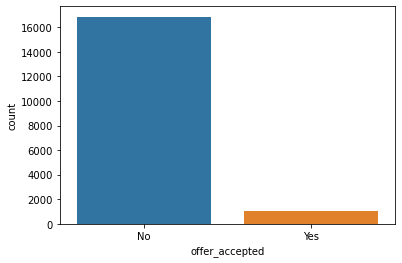

In [56]:
print("The class imbalance ratio is: {:.2f}".format((card['offer_accepted'].value_counts()[0]-
                                                     card['offer_accepted'].value_counts()[1])/
                                                    (card['offer_accepted'].value_counts()[0]+
                                                     card['offer_accepted'].value_counts()[1])))

classes = card['offer_accepted'].value_counts()
print(classes)
sns.countplot(x = 'offer_accepted', data = card);
plt.show()

There is a huge imbalance

In [57]:
y_train = y_train['offer_accepted']
y_test = y_test['offer_accepted']

In [58]:
lr = LogisticRegression(random_state = 100, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_treated, y_train)

y_train_pred = lr.predict(X_train_treated)
y_test_pred = lr.predict(X_test_treated)

In [59]:
print("The accuracy on the TRAIN set {:.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The precision in the TRAIN set is: {:.3f}".format(precision_score(y_train, y_train_pred, pos_label = "No")))
print("The recall in the TRAIN set is: {:.3f}".format(recall_score(y_train, y_train_pred, pos_label = "No")))
print("The F1 in the TRAIN set is: {:.3f}".format(f1_score(y_train, y_train_pred, pos_label = "No")))
print("The Kappa in the TRAIN set is: {:.3f}".format(cohen_kappa_score(y_train, y_train_pred)))

print("\nThe accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_test_pred)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_test_pred, pos_label = "No")))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_test_pred, pos_label = "No")))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_test_pred, pos_label = "No")))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_test_pred)))

The accuracy on the TRAIN set 0.945
The precision in the TRAIN set is: 0.945
The recall in the TRAIN set is: 1.000
The F1 in the TRAIN set is: 0.971
The Kappa in the TRAIN set is: 0.000

The accuracy in the TEST set is: 0.94
The precision in the TEST set is: 0.94
The recall in the TEST set is: 1.00
The F1 in the TEST set is: 0.97
The Kappa in the TEST set is: 0.00


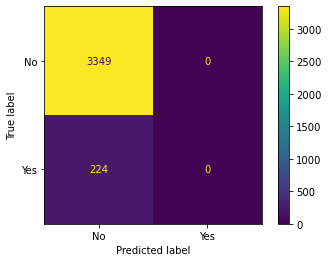

In [60]:
cm_test = confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = lr.classes_)
disp.plot()
plt.show()

In [61]:
sm = SMOTE(random_state = 100, k_neighbors = 30)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train_treated, y_train)

In [62]:
X_train_SMOTE.shape, X_train.shape

((26998, 22), (14292, 17))

In [63]:
lr_1= LogisticRegression(max_iter=1000)

lr_1.fit(X_train_SMOTE, y_train_SMOTE)

y_test_pred_1 = lr_1.predict(X_test_treated)

In [64]:
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_test_pred_1)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_test_pred_1, pos_label = "No")))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_test_pred_1, pos_label = "No")))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_test_pred_1, pos_label = "No")))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_test_pred_1)))

The accuracy in the TEST set is: 0.68
The precision in the TEST set is: 0.97
The recall in the TEST set is: 0.68
The F1 in the TEST set is: 0.80
The Kappa in the TEST set is: 0.12


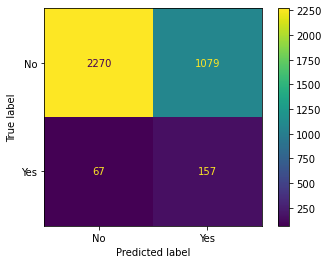

In [65]:
cm_test_1 = confusion_matrix(y_test,y_test_pred_1)
disp_1 = ConfusionMatrixDisplay(confusion_matrix = cm_test_1, display_labels = lr_1.classes_)
disp_1.plot()
plt.show()

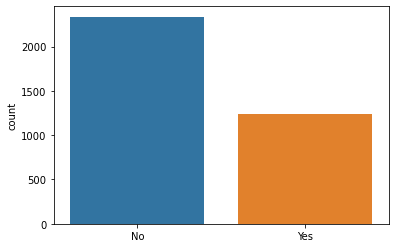

In [66]:
sns.countplot(x = lr_1.predict(X_test_treated), data = y);
plt.show()

We still see class imbalance but it has been reduced notably 